# Task 1

## Task 1.1

In [1]:
import numpy as np
from CartPole import *
from sklearn import linear_model

In [35]:
    def start_the_cart(initial_values1, initial_values2=None, initial_values3=None, steps=10, remap_angle=False, visual=False, display_plots=True, variable = None):

        cp = CartPole(visual=visual)
        cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity = initial_values1
        
        

        for step in range(steps):
            if visual: 
                cp.drawPlot()
            cp.performAction()
            if remap_angle: 
                cp.remap_angle()
            inter= [cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity]
            try: 
                x_history = np.vstack((x_history, np.array(inter)))
            except:
                x_history = np.vstack((np.array(initial_values1),np.array(inter)))
        

        
        x_axis=range(len(x_history))
        
        if initial_values2:
            cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity = initial_values2
        
           

            for step in range(steps):
                if visual: cp.drawPlot()
                cp.performAction()
                if remap_angle: cp.remap_angle()
                inter= [cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity]
                try: 
                    y_history = np.vstack((y_history, np.array(inter)))
                except:
                    y_history = np.vstack((np.array(initial_values2),np.array(inter)))
        
        if initial_values3:
            cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity = initial_values3
        
            

            for step in range(steps):
                if visual: cp.drawPlot()
                cp.performAction()
                if remap_angle: cp.remap_angle()
                inter= [cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity]
                try: 
                    z_history = np.vstack((z_history, np.array(inter)))
                except:
                    z_history = np.vstack((np.array(initial_values3),np.array(inter)))
        
        if display_plots:
            fig, axs = plt.subplots(2, 2, figsize=(10, 7))

            axs[0,0].plot(x_axis, [x[0] for x in x_history],label='First')
            if initial_values2: axs[0,0].plot(x_axis, [x[0] for x in y_history],label='Second')
            if initial_values3: axs[0,0].plot(x_axis, [x[0] for x in z_history],label='Third')

            axs[0,1].plot(x_axis, [x[1] for x in x_history])
            if initial_values2: axs[0,1].plot(x_axis, [x[1] for x in y_history])
            if initial_values3: axs[0,1].plot(x_axis, [x[1] for x in z_history])
           
            axs[1,0].plot(x_axis, [x[2] for x in x_history])
            if initial_values2: axs[1,0].plot(x_axis, [x[2] for x in y_history])
            if initial_values3: axs[1,0].plot(x_axis, [x[2] for x in z_history])
            
            axs[1,1].plot(x_axis, [x[3] for x in x_history])
            if initial_values2: axs[1,1].plot(x_axis, [x[3] for x in y_history])
            if initial_values3: axs[1,1].plot(x_axis, [x[3] for x in z_history])
            
            #Set titles
            axs[0,0].set_title('Cart location')
            axs[0,0].set_xlabel('Steps')
            axs[0,0].set_ylabel('x')

            axs[0,1].set_title('Cart velocity')
            axs[0,1].set_xlabel('Steps')
            axs[0,1].set_ylabel('x_dot')


            axs[1,0].set_title('Pole angle')
            axs[1,0].set_xlabel('Steps')
            axs[1,0].set_ylabel('theta')

            axs[1,1].set_title('Pole velocity')
            axs[1,1].set_xlabel('Steps')
            axs[1,1].set_ylabel('theta_dot')

            if variable: fig.suptitle(('Effect of different initial {} on cart dynamics').format(variable),fontsize=16)

            fig.legend()
            fig.tight_layout()
        
        
        return x_history[-1]

### Stable equilibrium

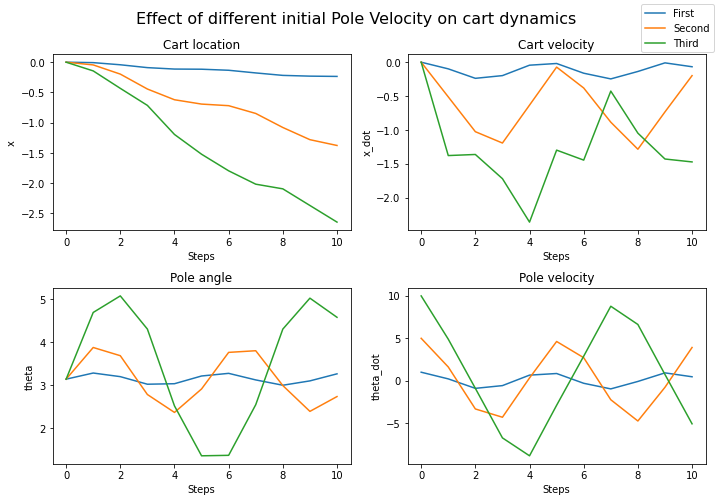

In [37]:
history = start_the_cart([0,0,np.pi,1],[0,0,np.pi,5],[0,0,np.pi,10],visual=False,remap_angle=False,variable = 'Pole Velocity')


### Complete rotation of pendulum

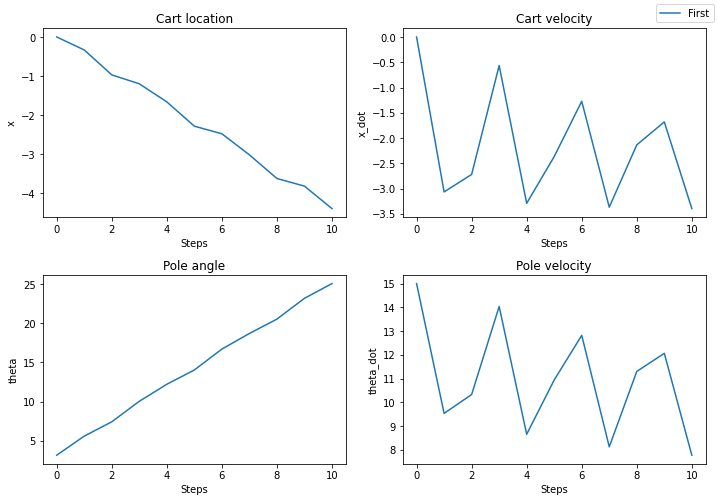

In [38]:
history = start_the_cart([0,0,np.pi,15],visual=False,remap_angle=False)

## Task 1.2

In [5]:
initialize = np.array([np.random.uniform(-5,5), np.random.uniform(-10, 10), np.random.uniform(-np.pi,np.pi), np.random.uniform(-15,15)])
print(initialize)

[-0.24600251 -9.27765677 -1.07361053  9.0956579 ]


In [6]:
variable_number={0:'Cart location',1:'Cart velocity',2:'Pole angle',3:'Pole velocity'}

In [7]:
def one_step(variable, x_axis_range, x_axis_intervals):
    
    
    
    x = initialize.copy()
    x_axis = np.linspace(x_axis_range[0],x_axis_range[1], x_axis_intervals)
    steps=1
    for i in x_axis:
        x[variable] = i
        y = start_the_cart(x, steps=steps, display_plots=False)

        try: 
            final_y = np.vstack((final_y, np.array(y)))
        except:
            final_y = np.array(y)

    fig, axs = plt.subplots(2, 2, figsize=(10, 7))
    axs[0,0].plot(x_axis, [y[0] for y in final_y])
    
    axs[0,1].plot(x_axis, [y[1] for y in final_y])
   
    axs[1,0].plot(x_axis, [y[2] for y in final_y])
    
    axs[1,1].plot(x_axis, [y[3] for y in final_y])
    

    #Set titles
            
    axs[0,0].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[0,0].set_ylabel('Cart location')

    
    axs[0,1].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[0,1].set_ylabel('Cart velocity')

    
    axs[1,0].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[1,0].set_ylabel('Pole angle')

    
    axs[1,1].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[1,1].set_ylabel('Pole velocity')

    fig.suptitle(('Effect of initial {} on cart dynamics after {} step'.format(variable_number[variable],steps)),fontsize=16)

    fig.tight_layout()

### Vary cart location


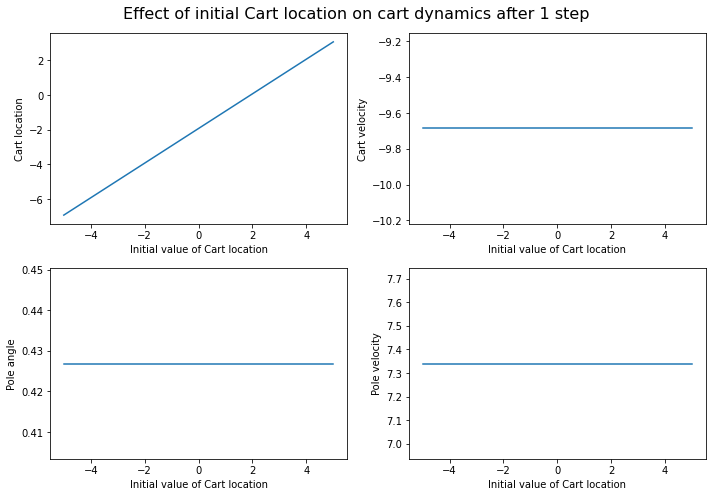

In [8]:
one_step(0,[-5,5],15)

### Vary cart velocity

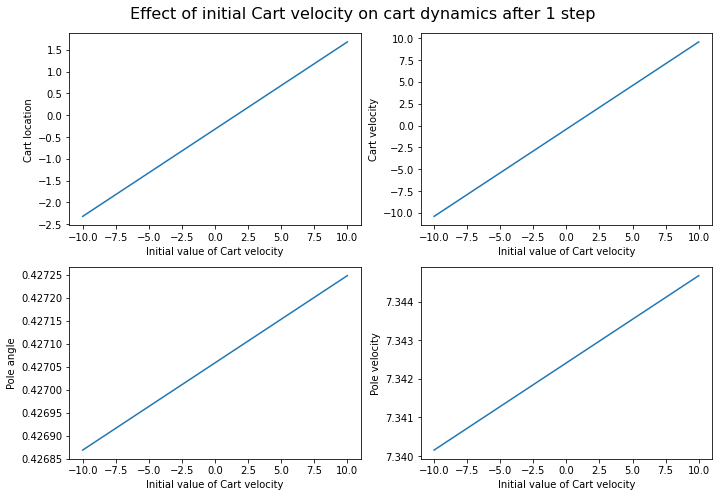

In [9]:
one_step(1,[-10,10],15)

### Vary pole angle

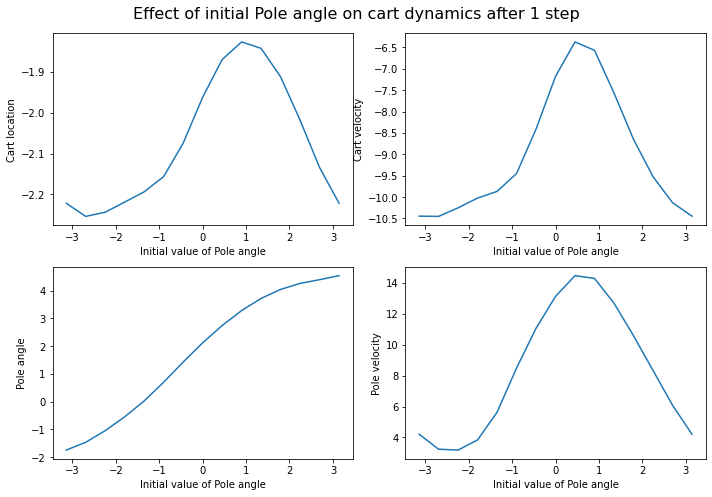

In [10]:
one_step(2,[-np.pi,np.pi],15)

### Vary pole velocity

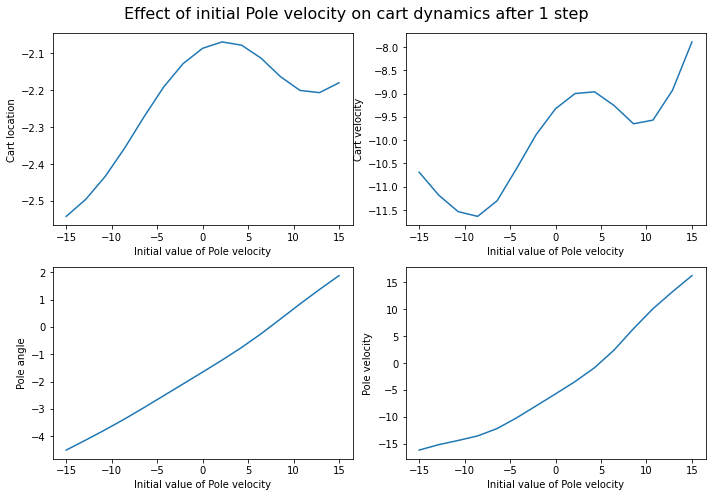

In [11]:
one_step(3,[-15,15],15)

### Creating a variable "y", the difference between x

In [12]:
def one_step_difference(variable, x_axis_range, x_axis_intervals):

    x = initialize.copy()
    x_axis = np.linspace(x_axis_range[0],x_axis_range[1], x_axis_intervals)
    steps=1
    for i in x_axis:
        x[variable] = i
        x_t = start_the_cart(x, steps=steps, display_plots=False)
        y = x_t-x
        
        try: 
            final_y = np.vstack((final_y, np.array(y)))
        except:
            final_y = np.array(y)
   

    fig, axs = plt.subplots(2, 2, figsize=(10, 7))
    axs[0,0].plot(x_axis, [y[0] for y in final_y])
    
    axs[0,1].plot(x_axis, [y[1] for y in final_y])

    axs[1,0].plot(x_axis, [y[2] for y in final_y])
    
    axs[1,1].plot(x_axis, [y[3] for y in final_y])
    

    #Set titles
            
    axs[0,0].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[0,0].set_ylabel('Cart location')

    
    axs[0,1].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[0,1].set_ylabel('Cart velocity')

    
    axs[1,0].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[1,0].set_ylabel('Pole angle')

    
    axs[1,1].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[1,1].set_ylabel('Pole velocity')

    fig.suptitle(('Effect of initial {} on cart dynamics after {} step'.format(variable_number[variable],steps)),fontsize=16)

    fig.tight_layout()

    return final_y

### (i) Scans of single relationships

### Vary cart location

array([[-1.92882742, -0.40901861,  1.50049316, -1.75534084],
       [-1.92882742, -0.40901861,  1.50049316, -1.75534084],
       [-1.92882742, -0.40901861,  1.50049316, -1.75534084],
       [-1.92882742, -0.40901861,  1.50049316, -1.75534084],
       [-1.92882742, -0.40901861,  1.50049316, -1.75534084],
       [-1.92882742, -0.40901861,  1.50049316, -1.75534084],
       [-1.92882742, -0.40901861,  1.50049316, -1.75534084],
       [-1.92882742, -0.40901861,  1.50049316, -1.75534084],
       [-1.92882742, -0.40901861,  1.50049316, -1.75534084],
       [-1.92882742, -0.40901861,  1.50049316, -1.75534084],
       [-1.92882742, -0.40901861,  1.50049316, -1.75534084],
       [-1.92882742, -0.40901861,  1.50049316, -1.75534084],
       [-1.92882742, -0.40901861,  1.50049316, -1.75534084],
       [-1.92882742, -0.40901861,  1.50049316, -1.75534084],
       [-1.92882742, -0.40901861,  1.50049316, -1.75534084]])

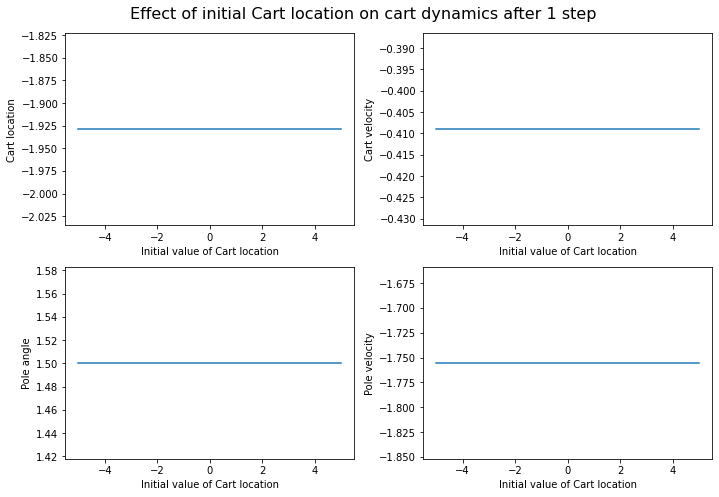

In [13]:
one_step_difference(0,[-5,5],15)

### Vary cart velocity

array([[-2.07328584, -0.40891876,  1.50047946, -1.75550405],
       [-1.78759178, -0.40911623,  1.50050656, -1.75518128],
       [-1.50189771, -0.4093137 ,  1.50053365, -1.7548585 ],
       [-1.21620364, -0.40951117,  1.50056074, -1.75453573],
       [-0.93050957, -0.40970863,  1.50058783, -1.75421297],
       [-0.6448155 , -0.40990609,  1.50061492, -1.7538902 ],
       [-0.35912144, -0.41010355,  1.50064201, -1.75356744],
       [-0.07342737, -0.41030101,  1.5006691 , -1.75324468],
       [ 0.2122667 , -0.41049846,  1.50069619, -1.75292193],
       [ 0.49796077, -0.41069591,  1.50072328, -1.75259918],
       [ 0.78365484, -0.41089336,  1.50075038, -1.75227642],
       [ 1.06934891, -0.41109081,  1.50077747, -1.75195368],
       [ 1.35504298, -0.41128826,  1.50080456, -1.75163093],
       [ 1.64073704, -0.4114857 ,  1.50083165, -1.75130819],
       [ 1.92643111, -0.41168314,  1.50085874, -1.75098545]])

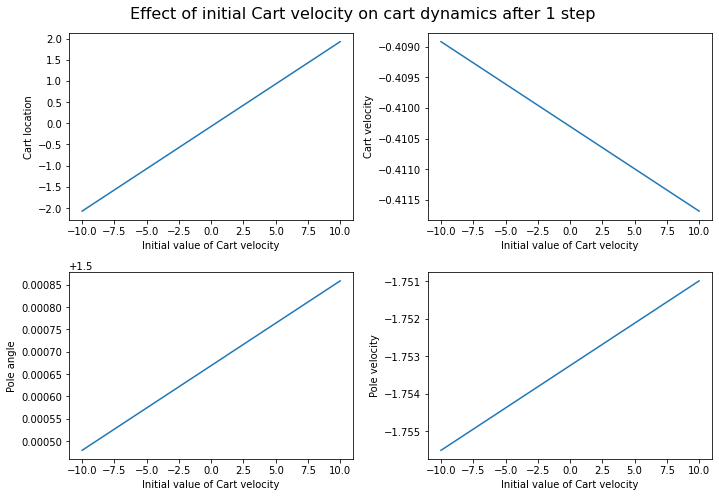

In [14]:
one_step_difference(1,[-10,10],15)

### Vary pole angle


array([[-1.97555303, -1.16881746,  1.39955301, -4.88755445],
       [-2.00768927, -1.17420192,  1.23053686, -5.85820314],
       [-1.99756087, -0.9740374 ,  1.20133885, -5.9139186 ],
       [-1.97270133, -0.74542886,  1.25045049, -5.25427048],
       [-1.94760065, -0.58908865,  1.37397479, -3.46232891],
       [-1.9104179 , -0.17077112,  1.60002069, -0.60480078],
       [-1.82872144,  0.86885629,  1.87489221,  1.96954982],
       [-1.7165478 ,  2.10293238,  2.11952919,  4.03249688],
       [-1.62427657,  2.9081125 ,  2.29397915,  5.37603774],
       [-1.58104301,  2.71144828,  2.38471157,  5.19603907],
       [-1.59679801,  1.7128368 ,  2.37346353,  3.590254  ],
       [-1.66631919,  0.62947433,  2.24974611,  1.48741267],
       [-1.77236731, -0.24376363,  2.01647283, -0.75438529],
       [-1.88807556, -0.85287813,  1.70218245, -3.00547993],
       [-1.97555303, -1.16881746,  1.39955301, -4.88755445]])

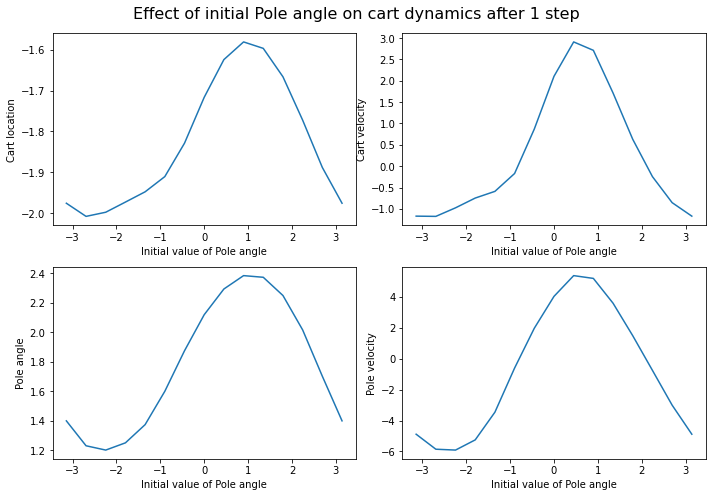

In [15]:
one_step_difference(2,[-np.pi,np.pi],15)


### Vary pole velocity

array([[-2.29587946, -1.41034429, -3.43282616, -1.16045174],
       [-2.24983281, -1.9010616 , -3.0675287 , -2.30258794],
       [-2.18770025, -2.2564657 , -2.69090448, -3.66406771],
       [-2.11077554, -2.35827394, -2.29406526, -4.96310067],
       [-2.02561788, -2.02289846, -1.87509198, -5.73621824],
       [-1.94544816, -1.32986228, -1.44428622, -5.89288369],
       [-1.88195907, -0.60446327, -1.01249215, -5.81431323],
       [-1.84047948, -0.04532119, -0.58043594, -5.72814697],
       [-1.82319694,  0.27871105, -0.14050004, -5.58973205],
       [-1.8319725 ,  0.31656752,  0.32102144, -5.15915712],
       [-1.86714514,  0.02272978,  0.82179754, -4.03080807],
       [-1.91743409, -0.37012244,  1.36484016, -2.19760219],
       [-1.95461606, -0.29104044,  1.9148897 , -0.63253621],
       [-1.96061599,  0.34931764,  2.44270351,  0.37447934],
       [-1.93397046,  1.38749623,  2.95010622,  1.21690183]])

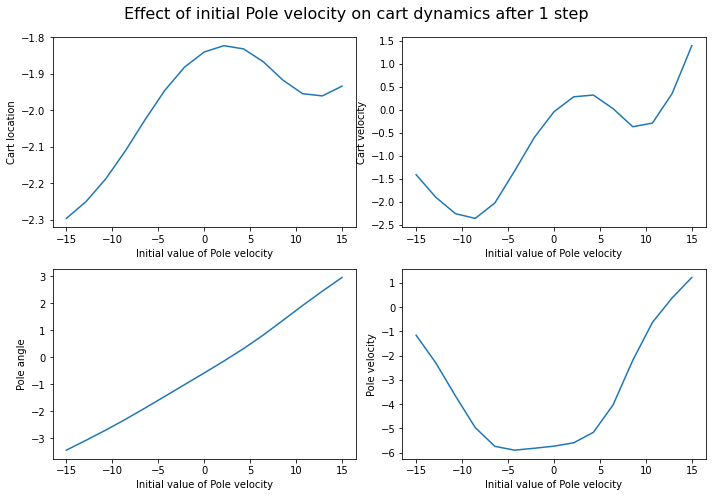

In [16]:
one_step_difference(3,[-15,15],15)

### (ii) Contour plots

In [17]:
different_pairs = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]
axes_ranges = {0 : np.linspace(-5,5,10), 1 : np.linspace(-10,10,10), 2 : np.linspace(-np.pi,np.pi,10), 3 : np.linspace(-15,15,10)}

def axes_for_pairs(index_pair):
    range_of_variables = []
    for index in index_pair:
        range_of_variables.append(axes_ranges[index])
    return range_of_variables

def contours_of_pairs(index_pair, range_of_variables):
  
   
    index_1, index_2 = index_pair
    range_1, range_2 = range_of_variables
    
    initial_grid = np.zeros((len(range_1),len(range_2),4))
    final_grid = np.zeros((len(range_1),len(range_2),4))
    
    for i,value_1 in enumerate(range_1):
        for j, value_2 in enumerate(range_2):
            x = initialize.copy()
            x[index_1] = value_1
            x[index_2] = value_2
            initial_grid[i,j] = x
            final_grid[i,j] = np.array(start_the_cart(x, steps=1, display_plots=False))
                            
    y_grid = final_grid - initial_grid
    y_grid = np.moveaxis(y_grid, -1, 0)   
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 9))
    
    axs[0,0].contourf(range_1, range_2, y_grid[0].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[0,0].set_title('cart_location')
    axs[0,0].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[0,0].set_ylabel('{} initial value'.format(variable_number[index_2]))   

    axs[0,1].contourf(range_1, range_2, y_grid[1].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[0,1].set_title('cart_velocity')
    axs[0,1].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[0,1].set_ylabel('{} initial value'.format(variable_number[index_2]))

    axs[1,0].contourf(range_1, range_2, y_grid[2].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[1,0].set_title('pole_angle')
    axs[1,0].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[1,0].set_ylabel('{} initial value'.format(variable_number[index_2]))

    axs[1,1].contourf(range_1, range_2, y_grid[3].T, vmin=y_grid.min(), vmax=y_grid.max())
    axs[1,1].set_title('pole_velocity')
    axs[1,1].set_xlabel('{} initial value'.format(variable_number[index_1]))
    axs[1,1].set_ylabel('{} initial value'.format(variable_number[index_2]))
    
    fig.tight_layout()

_____________________Plots of Cart location vs Cart velocity_____________________


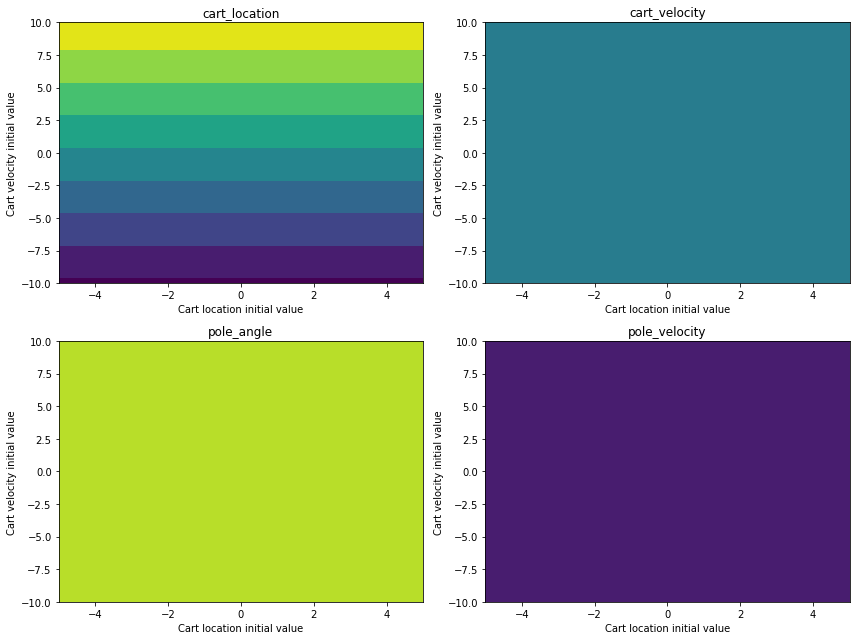

_____________________Plots of Cart location vs Pole angle_____________________


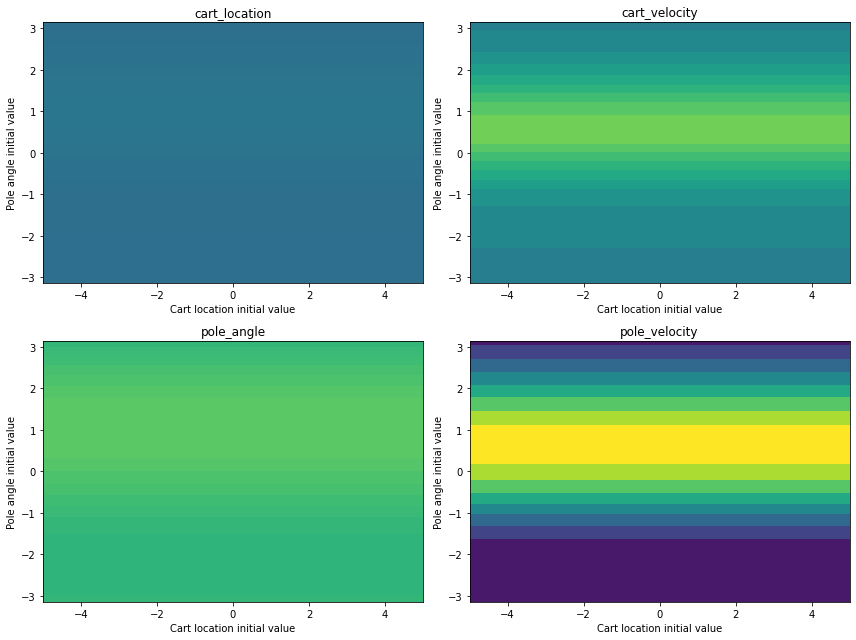

_____________________Plots of Cart location vs Pole velocity_____________________


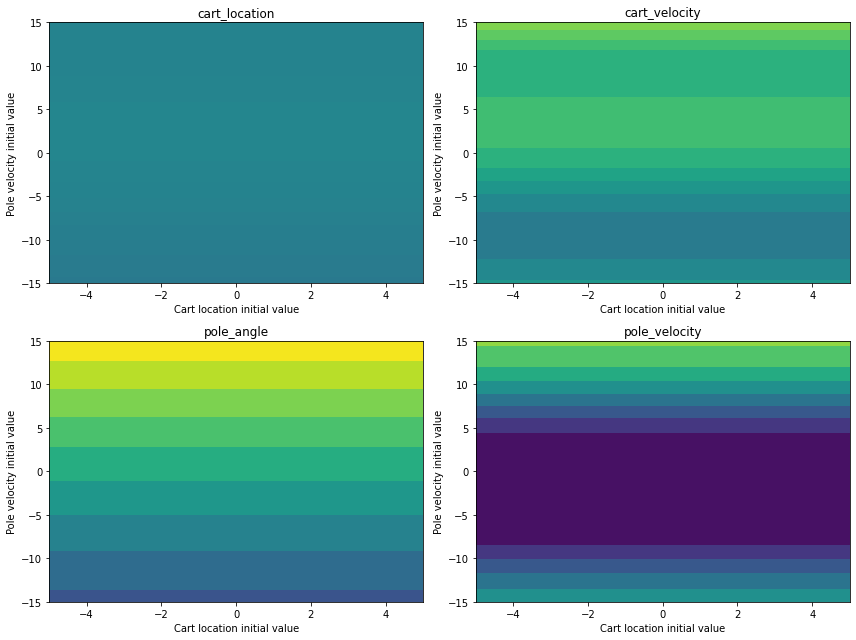

_____________________Plots of Cart velocity vs Pole angle_____________________


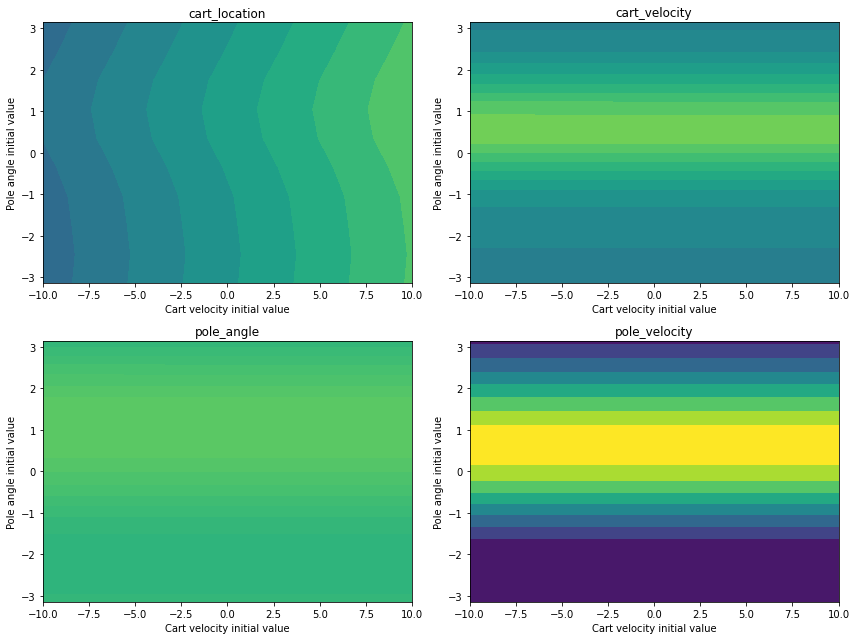

_____________________Plots of Cart velocity vs Pole velocity_____________________


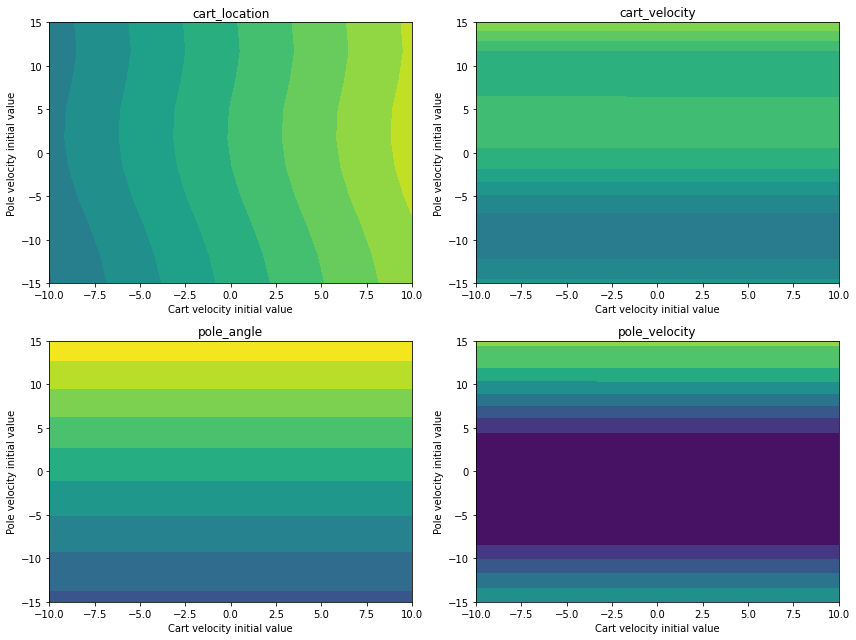

_____________________Plots of Pole angle vs Pole velocity_____________________


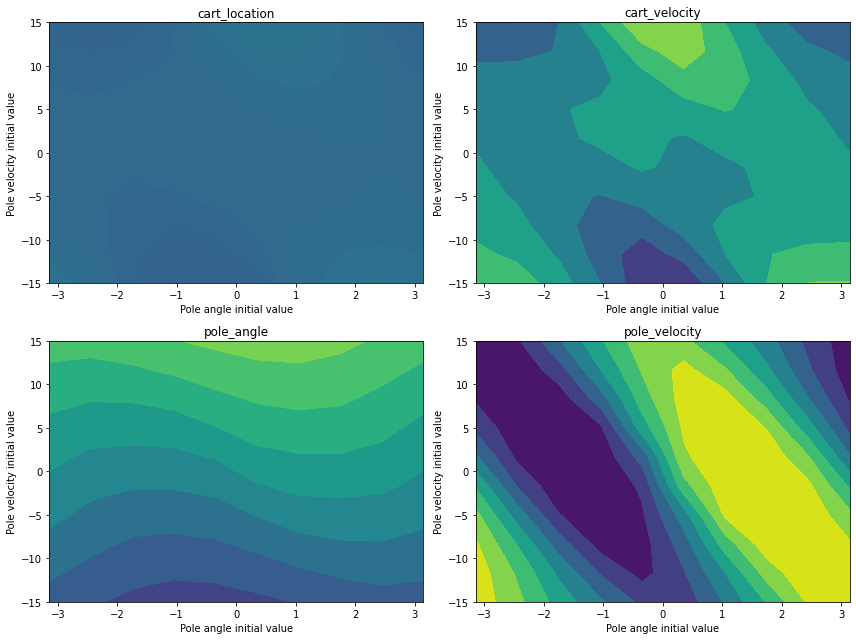

In [18]:
for indices in different_pairs:
     print('_____________________Plots of {} vs {}_____________________'.format(variable_number[indices[0]],variable_number[indices[1]]))
     contours_of_pairs(indices, axes_for_pairs(indices))
     plt.show()
     

## Task 1.3

In [19]:
def get_xy_pairs(n):
    
    for iteration in range(n):
        random_point= np.array([np.random.uniform(-5,5), np.random.uniform(-10, 10), np.random.uniform(-np.pi,np.pi), np.random.uniform(-15,15)])
        y = start_the_cart(random_point,steps=1, remap_angle=True,display_plots=False)
        try: 
            final_y = np.vstack((final_y, np.array(y)))
            final_x = np.vstack((final_x, np.array(random_point)))
        except:
            final_y = np.array(y)
            final_x = np.array(random_point)
        

    return final_x,final_y-final_x

In [20]:
x,y= get_xy_pairs(500)
get_xy_pairs(5)

(array([[  3.49974327,  -0.78636289,  -2.96606843,  11.50528502],
        [ -3.27971682,   1.85107162,  -1.1507522 ,  -4.47719499],
        [  3.30323366,   8.61177767,  -0.81557167, -12.88669501],
        [  4.64063237,   9.28617274,  -0.41619883,   1.64697227],
        [  4.51649301,   5.86514016,  -0.77852321, -13.13223694]]),
 array([[-0.37146118, -1.82966288,  1.73815532, -5.7348406 ],
        [ 0.26791671, -1.42992902, -1.48891645, -5.89783233],
        [ 1.29314429, -2.76566387,  3.20014636, -3.2300537 ],
        [ 1.89272615,  0.34786037,  0.01392196, -3.06886094],
        [ 0.7320316 , -2.85192289,  3.15760524, -3.20309185]]))

In [21]:
#Create train and test sets
proportion = 0.95
number_of_samples = 500
cutoff = int(proportion*number_of_samples)
train_x= x[:cutoff]
test_x=x[cutoff:]

train_y=y[:cutoff]
test_y=y[cutoff:]


In [22]:
model = linear_model.LinearRegression()
model.fit(train_x,train_y)
m=model.predict(test_x)

### First plot. Real and predicted plotted against initial

In [23]:
def vertical_plot(input,next_step,pred_next_step):

    fig, axs = plt.subplots(2, 2, figsize=(10, 7))

    axs[0,0].scatter([x[0] for x in input],[y[0] for y in next_step],label='Real value')
    axs[0,0].scatter([x[0] for x in input],[y[0] for y in pred_next_step],label='Predicted Value')
    axs[0,0].set_xlabel('Cart location initial value')
    axs[0,0].set_ylabel('Cart location final value')
    axs[0,0].legend()

    axs[0,1].scatter([x[1] for x in input],[y[1] for y in next_step])
    axs[0,1].scatter([x[1] for x in input],[y[1] for y in pred_next_step])
    axs[0,1].set_xlabel('Cart velocity initial value')
    axs[0,1].set_ylabel('Cart velocity final value')

    axs[1,0].scatter([x[2] for x in input],[y[2] for y in next_step])
    axs[1,0].scatter([x[2] for x in input],[y[2] for y in pred_next_step])
    axs[1,0].set_xlabel('Pole angle initial value')
    axs[1,0].set_ylabel('Pole angle final value')

    axs[1,1].scatter([x[3] for x in input],[y[3] for y in next_step])
    axs[1,1].scatter([x[3] for x in input],[y[3] for y in pred_next_step])
    axs[1,1].set_xlabel('Pole velocity initial value')
    axs[1,1].set_ylabel('Pole velocity final value')

    fig.suptitle('Predictions vs Real values after 1 step plotted against various initial values')
    fig.tight_layout()

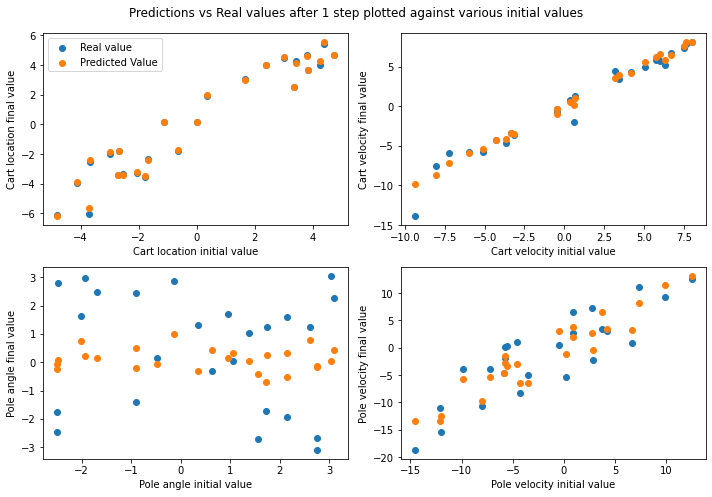

In [24]:
vertical_plot(test_x,test_y+test_x,m+test_x)

### second plot. This one is real vs predicted only

In [25]:
def real_vs_predicted(real,predicted):
    fig, axs = plt.subplots(2, 2, figsize=(10, 7))

    axs[0,0].scatter([x[0] for x in real],[y[0] for y in predicted])
   
    axs[0,0].set_xlabel('Cart location real value')
    axs[0,0].set_ylabel('Cart location predicted value')
    

    axs[0,1].scatter([x[1] for x in real],[y[1] for y in predicted])
    axs[0,1].set_xlabel('Cart velocity real value')
    axs[0,1].set_ylabel('Cart velocity predicted value')

    axs[1,0].scatter([x[2] for x in real],[y[2] for y in predicted])
    axs[1,0].set_xlabel('Pole angle real value')
    axs[1,0].set_ylabel('Pole angle predicted value')

    axs[1,1].scatter([x[3] for x in real],[y[3] for y in predicted])
    axs[1,1].set_xlabel('Pole velocity real value')
    axs[1,1].set_ylabel('Pole velocity predicted value')

    fig.suptitle('Predictions vs Real values after 1 step')
    fig.tight_layout()

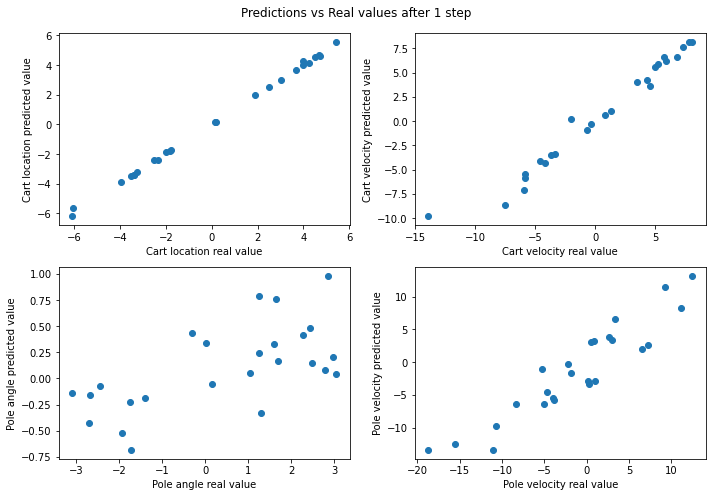

In [26]:
real_vs_predicted(test_y+test_x,m+test_x)

### Scans with varying parameters

In [27]:
def one_step_difference_with_predictions(variable, x_axis_range, x_axis_intervals):

    x = initialize.copy()
    x_axis = np.linspace(x_axis_range[0],x_axis_range[1], x_axis_intervals)
    steps=1
    for i in x_axis:
        x[variable] = i
        x_t = start_the_cart(x, steps=steps, display_plots=False)
        y = x_t-x
        pred = model.predict([x])
        try: 
            final_y = np.vstack((final_y, np.array(y)))
            final_pred = np.vstack((final_pred,np.array(pred)))
        except:
            final_y = np.array(y)
            final_pred = np.array(pred)
   
   
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs[0,0].plot(x_axis, [y[0] for y in final_y],label='Real value')
    axs[0,0].plot(x_axis, [y[0] for y in final_pred],label='Predicted value')
    axs[0,0].legend()
    
    axs[0,1].plot(x_axis, [y[1] for y in final_y])
    axs[0,1].plot(x_axis, [y[1] for y in final_pred])

    axs[1,0].plot(x_axis, [y[2] for y in final_y])
    axs[1,0].plot(x_axis, [y[2] for y in final_pred])
    
    axs[1,1].plot(x_axis, [y[3] for y in final_y])
    axs[1,1].plot(x_axis, [y[3] for y in final_pred])
    

    #Set titles
            
    axs[0,0].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[0,0].set_ylabel('Cart location change')

    
    axs[0,1].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[0,1].set_ylabel('Cart velocity change')

    
    axs[1,0].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[1,0].set_ylabel('Pole angle change')

    
    axs[1,1].set_xlabel('Initial value of {}'.format(variable_number[variable]))
    axs[1,1].set_ylabel('Pole velocity change')

    fig.suptitle(('Effect of varying initial {} on cart dynamics (predicted and real) after {} step'.format(variable_number[variable],steps)),fontsize=16)

    fig.tight_layout()

### Vary cart location

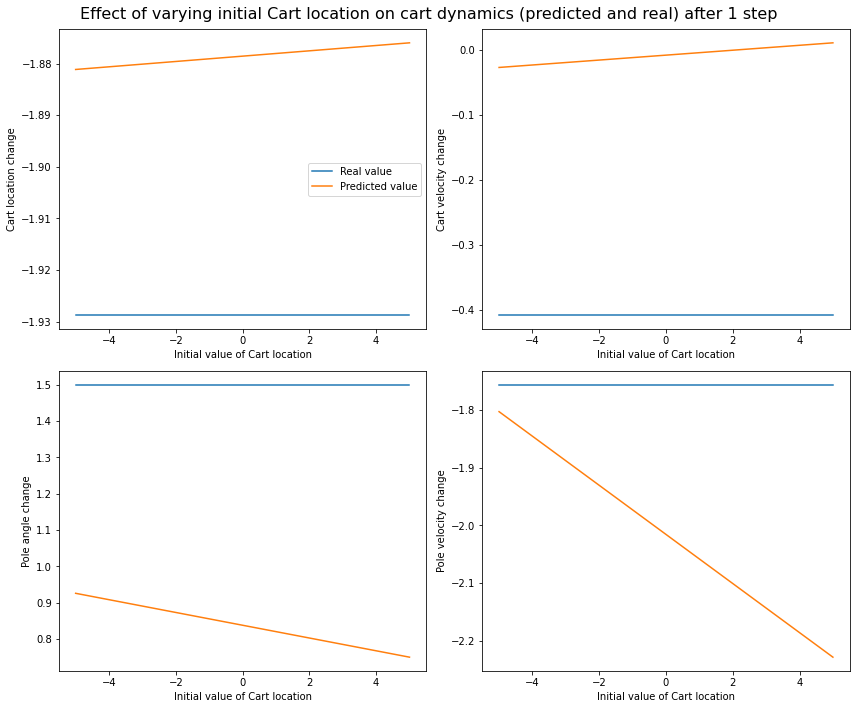

In [28]:
one_step_difference_with_predictions(0,[-5,5],15)

### Vary cart velocity

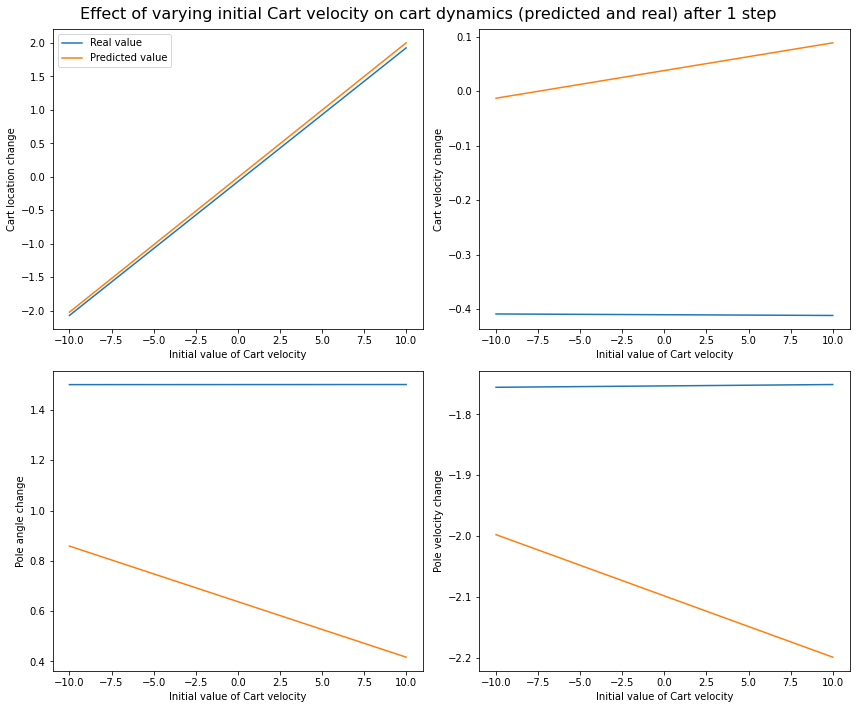

In [29]:
one_step_difference_with_predictions(1,[-10,10],15)

### Vary pole angle

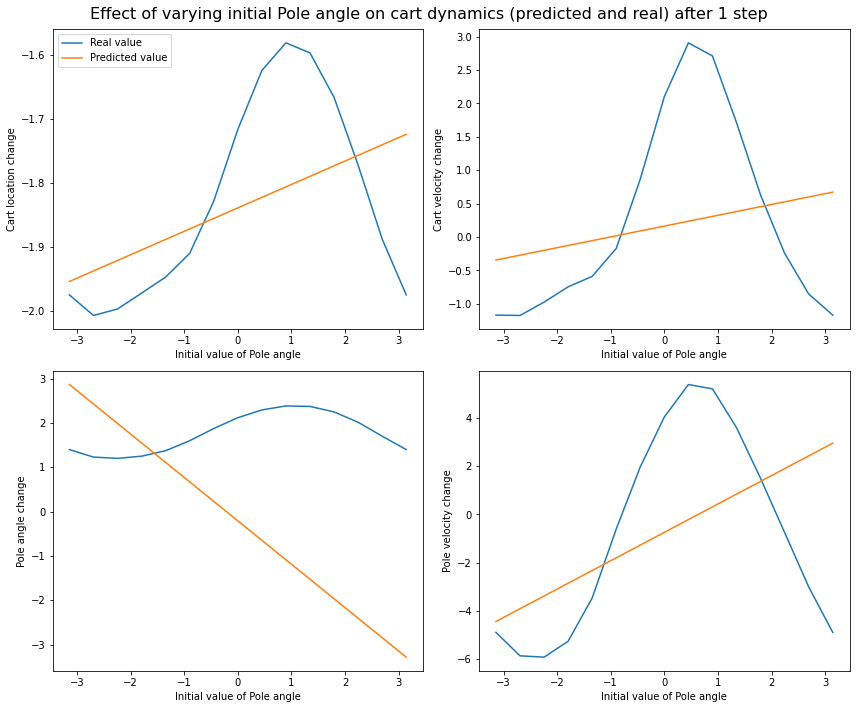

In [30]:
one_step_difference_with_predictions(2,[-np.pi,np.pi],15)

### Vary pole velocity

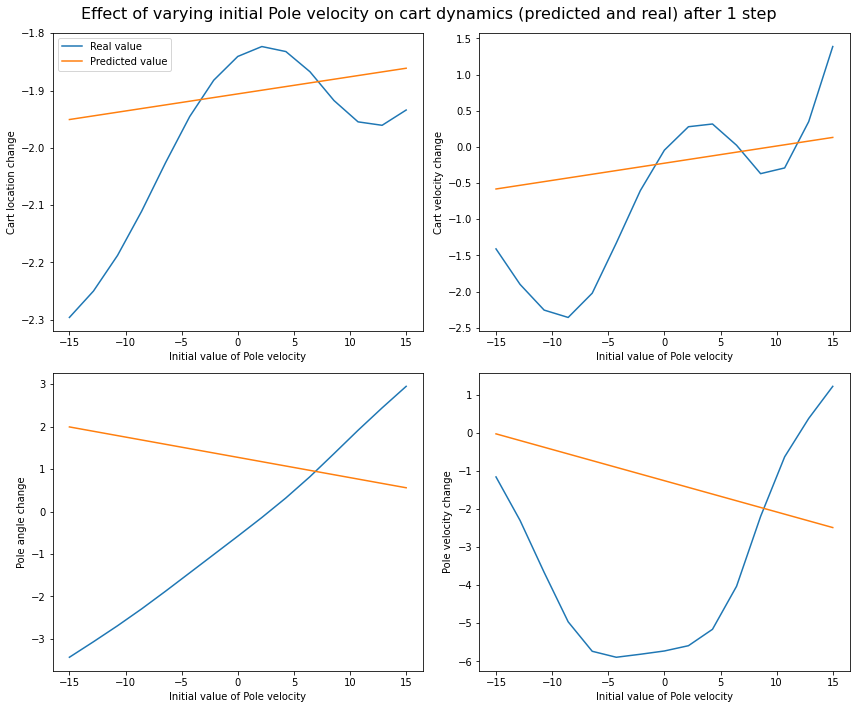

In [31]:
one_step_difference_with_predictions(3,[-15,15],15)

## Task 1.4

In [32]:
def future_predictions(initial_conditions, time_steps):
    final_y=np.array(initial_conditions)
    final_pred=np.array(initial_conditions)
    for i in range(time_steps):
        real= start_the_cart(final_y[i], steps=1, display_plots=False,remap_angle=True)
        pred = model.predict([final_pred[i]])
        pred+=final_pred[i]

         
        final_y = np.vstack((final_y, np.array(real)))
        final_pred = np.vstack((final_pred,np.array(pred)))

    x_axis=np.linspace(0,time_steps,time_steps+1)
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    axs[0,0].plot(x_axis, [y[0] for y in final_y],label='Real value')
    axs[0,0].plot(x_axis, [y[0] for y in final_pred],label='Predicted value')
    axs[0,0].legend()
    
    axs[0,1].plot(x_axis, [y[1] for y in final_y])
    axs[0,1].plot(x_axis, [y[1] for y in final_pred])

    axs[1,0].plot(x_axis, [y[2] for y in final_y])
    axs[1,0].plot(x_axis, [y[2] for y in final_pred])
    
    axs[1,1].plot(x_axis, [y[3] for y in final_y])
    axs[1,1].plot(x_axis, [y[3] for y in final_pred])
    

    #Set titles
            
    axs[0,0].set_xlabel('Time steps')
    axs[0,0].set_ylabel('Cart location')

    
    axs[0,1].set_xlabel('Time steps')
    axs[0,1].set_ylabel('Cart velocity')

    
    axs[1,0].set_xlabel('Time steps')
    axs[1,0].set_ylabel('Pole angle')

    
    axs[1,1].set_xlabel('Time steps')
    axs[1,1].set_ylabel('Pole velocity')

    fig.suptitle('Predicted vs Real change in cart dynamics over time with initial conditions {}'.format(initial_conditions),fontsize=16)

    fig.tight_layout()

    

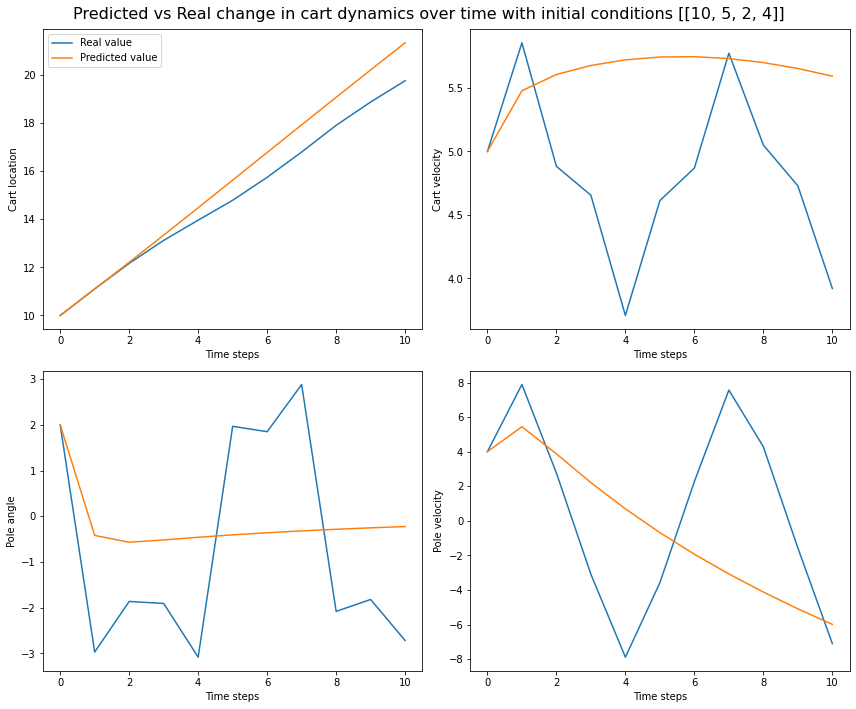

In [33]:
future_predictions([[10,5,2,4]],10)

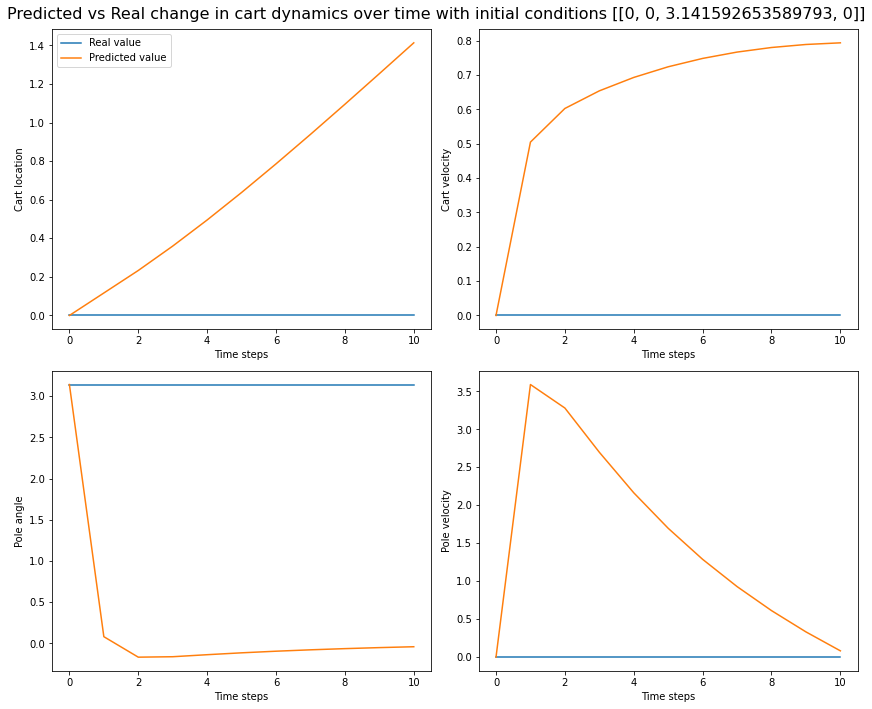

In [34]:
future_predictions([[0,0,np.pi,0]],10)